<a href="https://colab.research.google.com/github/dpanagop/ML_and_AI_examples/blob/master/NLP_example_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Download content from wikipedia
First wikipedia library must be installed 

In [1]:
!pip install wikipedia

Defaulting to user installation because normal site-packages is not writeable


Download content from Wikipedia on
* Data Science
* Artificial intelligence
* Machine Learning
* European Central Bank
* Bank
* Financial technology
* International Monetary Fund
* Basketball
* Swimming
* Tennis

In [2]:
import pandas as pd
import wikipedia
wikipedia.set_lang("en")

articles = ['/data_science', '/artificial_intelligence','/machine_learning',
           '/bank','/european_central_bank','/international_monetary_fund','/financial_technology',
           '/basketball','/swimming','/tennis']
wiki_lst=[]
title=[]
for article in articles:
    print("loading content: ",article)
    wiki_lst.append(wikipedia.page(article).content)
    title.append(wikipedia.page(article).title)
print("examine content")
print(wiki_lst)
print(title)

loading content:  /data_science
loading content:  /artificial_intelligence
loading content:  /machine_learning
loading content:  /bank
loading content:  /european_central_bank
loading content:  /international_monetary_fund
loading content:  /financial_technology
loading content:  /basketball
loading content:  /swimming
loading content:  /tennis
examine content
['Data science is an interdisciplinary academic field  that uses statistics, scientific computing, scientific methods, processes, algorithms and systems to extract or extrapolate knowledge and insights from noisy, structured, and unstructured data.Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine). Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.Data science is a "concept to unify statistics, data analysis, informatics, and their related

##TF-IDF example

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(wiki_lst)

In [4]:
feature_names = vectorizer.get_feature_names_out()
print(feature_names)
print(X.shape)

['00' '000' '0001' ... 'čapek' 'šarūnas' 'σφαιριστική']
(10, 8207)


In [5]:
print(X[0,])

  (0, 6136)	0.007252114370852348
  (0, 2748)	0.01297009732475438
  (0, 4297)	0.011647880542612768
  (0, 5930)	0.019615142509257756
  (0, 8121)	0.011647880542612768
  (0, 5182)	0.00870740120522235
  (0, 5195)	0.01052996218216085
  (0, 5210)	0.014588359880003189
  (0, 2307)	0.009561577250748621
  (0, 5229)	0.01297009732475438
  (0, 1683)	0.01052996218216085
  (0, 6892)	0.01297009732475438
  (0, 1992)	0.011647880542612768
  (0, 7850)	0.019615142509257756
  (0, 1239)	0.014588359880003189
  (0, 6343)	0.007943314695499814
  (0, 6587)	0.014588359880003189
  (0, 4632)	0.01297009732475438
  (0, 1116)	0.02612220361566705
  (0, 1320)	0.019615142509257756
  (0, 1813)	0.007252114370852348
  (0, 1801)	0.014588359880003189
  (0, 4589)	0.01297009732475438
  (0, 6459)	0.01052996218216085
  (0, 4222)	0.007943314695499814
  :	:
  (0, 4969)	0.01052996218216085
  (0, 746)	0.043765079640009565
  (0, 7749)	0.014588359880003189
  (0, 2496)	0.050023989515602
  (0, 3995)	0.019615142509257756
  (0, 7826)	0.01961

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

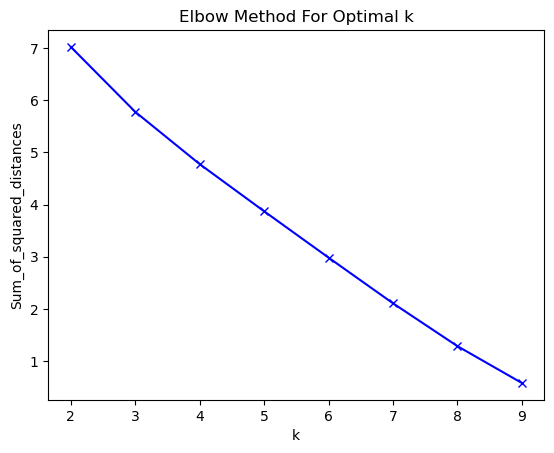

In [7]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [8]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

                         title  cluster
6                      Fintech        0
1      Artificial intelligence        1
2             Machine learning        1
8             Swimming (sport)        2
7                   Basketball        3
9                       Tennis        3
3                         Bank        4
4        European Central Bank        4
5  International Monetary Fund        4
0                 Data science        5


Cluster: 0
Titles
Fintech


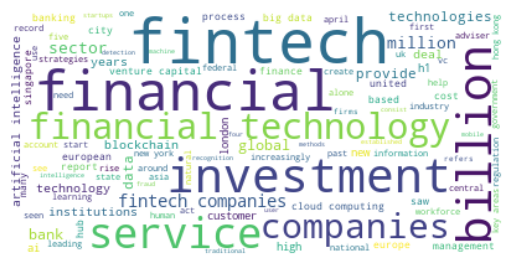

Cluster: 1
Titles
Artificial intelligence
       Machine learning


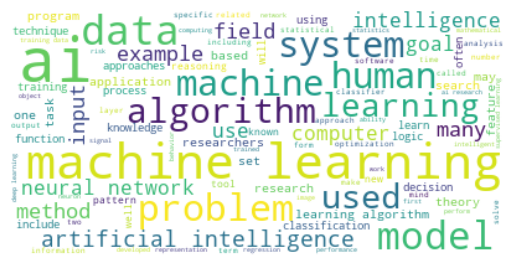

Cluster: 2
Titles
Swimming (sport)


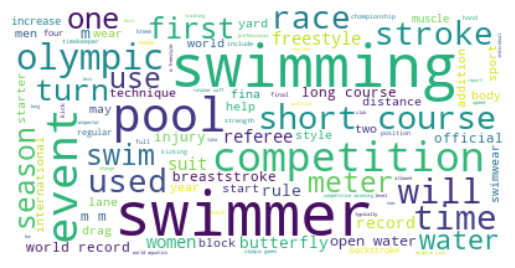

Cluster: 3
Titles
Basketball
    Tennis


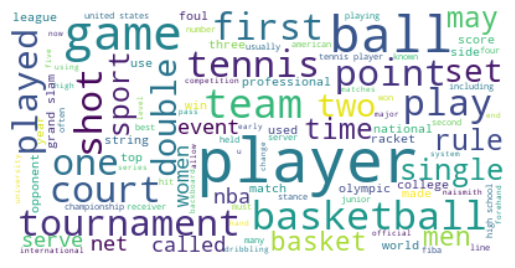

Cluster: 4
Titles
                       Bank
      European Central Bank
International Monetary Fund


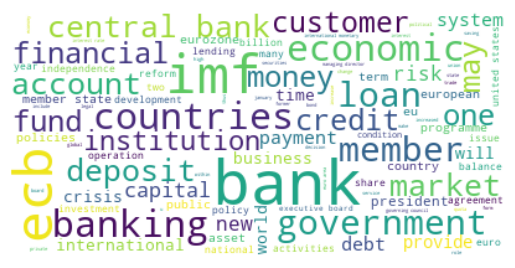

Cluster: 5
Titles
Data science


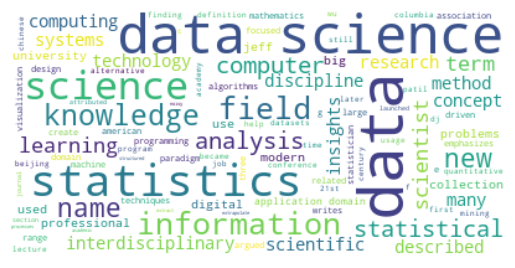

In [9]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    print(titles.to_string(index=False))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()